# Simple SIR Models for COVID-19 Epidemic
(**อ้างอิงตัวอย่าง 5.16**)
แบบจำลองต่อไปนี้เป็นการนำระบบสมการ Lotka-Volterra มาปรับปรุงเพื่อใช้ในการศึกษาการระบาดของโรคติดต่อในประชากรหนึ่งกลุ่ม

กำหนดให้ $N$ คือ จำนวนประชากรทั้งหมด ซึ่งประชากรกลุ่มนี้ถูกแบ่งออกเป็นสามกลุ่มตามสภาวะของการติดโรค โดยที่ $S$ คือ จำนวนของประชากรที่ยังไม่ได้ติดโรค (Susceptible Compartment) และมีโอกาสจะติดโรคได้, $I$ คือ จำนวนของประชากรที่ติดโรค (Infectious Compartment) และ $R$ (Resistant Compartment) คือ จำนวนประชากรที่ได้รับการรักษาหายและมีภูมิคุ้มกันจากโรคนี้

อัตราการเปลี่ยนแปลงของจำนวนประชากรในแต่ละกลุ่ม แสดงได้ดังระบบสมการเชิงอนุพันธ์ต่อไปนี้ 
\begin{align*}
\dfrac{\mathrm{d}S}{\mathrm{d}t} &= -\beta SI + \delta R  \\
\dfrac{\mathrm{d}I}{\mathrm{d}t} &= \beta SI - \gamma I \\
\dfrac{\mathrm{d}R}{\mathrm{d}t} &= \gamma I - \delta R  
\end{align*}
โดยที่ $\beta$ คือ อัตราการการระบาดของโรค, $\gamma$ คือ อัตราการรักษาโรค และ $\delta$ คือ อัตราการเสื่อมถอยของภูมิคุ้มกัน
ซึ่งจากระบบสมการเชิงอนุพันธ์จะเห็นว่า
$$ \dfrac{\mathrm{d}N}{\mathrm{d}t} = \dfrac{\mathrm{d}}{\mathrm{d}t}(S+I+R) = \dfrac{\mathrm{d}S}{\mathrm{d}t} + \dfrac{\mathrm{d}I}{\mathrm{d}t} + \dfrac{\mathrm{d}R}{\mathrm{d}t} = 0 $$
นั่นคือจำนวนประชากรทั้งหมด $N$ นั้นเป็นค่าคงที่

 แสดงผลเฉลยเชิงตัวเลขของระบบสมการเชิง ด้วยเงื่อนไขค่าเริ่มต้น $S(0) = 997$, $I(0) = 3$, $R(0) = 0$ ค่าพารามิเตอร์ $\beta = 0.4$, $\gamma = 0.04$, และ $\delta = 0$


จากตัวอย่างข้างต้น ให้นักศึกษานำระบบสมการ Lotka-Volterra มาปรับปรุงเพื่อใช้ในการศึกษาการระบาดของโรค COVID-19

แบบจำลองใหม่นี้เป็นแบบ SEIQR ที่เพิ่มกลุ่มผู้สัมผัสเชื้อ (E) และกลุ่มที่ถูกกักตัว (Q) โดยมีสมการดังนี้:

\begin{align*}
\dfrac{dS}{dt} &= -\beta S I   \\
\dfrac{dE}{dt} &= \beta S I - \sigma E  \\
\dfrac{dI}{dt} &= \sigma E - \gamma I - \delta I   \\
\dfrac{dQ}{dt} &= \delta I - \lambda Q \  \\
\dfrac{dR}{dt} &= \gamma I + \lambda Q \} 
\end{align*}
 เมื่อ $\beta$ - อัตราการติดเชื้อ
  $\sigma$ - อัตราที่ผู้สัมผัสเชื้อเปลี่ยนเป็นผู้ติดเชื้อ
  $\gamma$ - อัตราการฟื้นตัวของผู้ป่วย
 $\delta$ - อัตราการส่งผู้ป่วยไปกักตัว
  $\lambda$ - อัตราการฟื้นตัวของผู้ที่ถูกกักตัว


## การวิเคราะห์เชิงตัวเลข
ตั้งค่าเริ่มต้นดังนี้:
 $S(0) = 9990$, $E(0) = 5$, $I(0) = 5$, $Q(0) = 0$, $R(0) = 0$
$\beta = 0.3$, $\sigma = 0.2$, $\gamma = 0.05$, $\delta = 0.02$, $\lambda = 0.1$


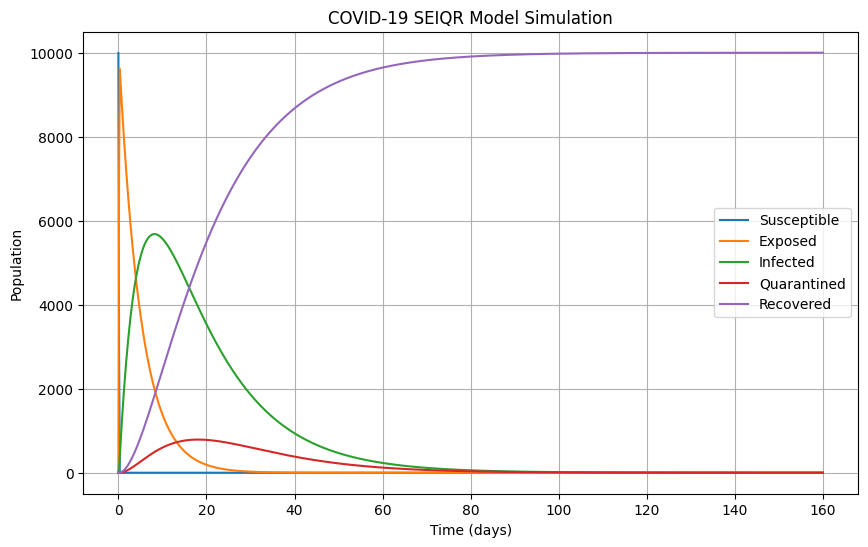

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def seiqr_model(y, t, beta, sigma, gamma, delta, lam):
    S, E, I, Q, R = y
    dSdt = -beta * S * I
    dEdt = beta * S * I - sigma * E
    dIdt = sigma * E - gamma * I - delta * I
    dQdt = delta * I - lam * Q
    dRdt = gamma * I + lam * Q
    return [dSdt, dEdt, dIdt, dQdt, dRdt]

# กำหนดค่าพารามิเตอร์
beta, sigma, gamma, delta, lam = 0.3, 0.2, 0.05, 0.02, 0.1
S0, E0, I0, Q0, R0 = 9990, 5, 5, 0, 0

y0 = [S0, E0, I0, Q0, R0]
t = np.linspace(0, 160, 1000)  # 160 วัน

sol = odeint(seiqr_model, y0, t, args=(beta, sigma, gamma, delta, lam))
S, E, I, Q, R = sol.T

plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, E, label='Exposed')
plt.plot(t, I, label='Infected')
plt.plot(t, Q, label='Quarantined')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('COVID-19 SEIQR Model Simulation')
plt.grid()
plt.show()